# Practical 1

## How to work on the practical
To work on your practical you need to open the `Practical_work.ipynb` file through Jupyter notebook.
A separate `pdf` file contains the script that you need to follow with snippets of code that you will need to add to your notebook.
There are segements where you need to create your own code, or add your own comments. These are all indicated with the note **ToDo**.
For some of the tasks you may need to revisit the lecture notes to check some of the code examples that were presented there.


# Description
In this practical you will work with a dataset holding information about potential bank clients seeking to get a loan.
The dataset holds information about their employment, family, age, and financial state. The purpose is to use this information to explore the potential risk of an individual to default on a loan. In the dataset this is reflected on the feature `debt` which indicates if a person has defaulted in the payments of a loan.

## Description of the features in the dataset
- children: the number of children in the family 
- days_employed: how long the customer has worked 
- dob_years: the customer’s age 
- education: the customer’s education level 
- education_id: identifier for the customer’s education 
- family_status: the customer’s marital status 
- family_status_id: identifier for the customer’s marital status 
- gender: the customer’s gender 
- income_type: the customer’s income type 
- debt: whether the client has ever defaulted on a loan 
- total_income: annual income 
- purpose: reason for taking out a loan written by the client
- purpose-short: processed fixed text representing the purpose for the loan

## Objective
The dataset is not cleaned. As part of this assignment you will need to clean your dataset and prepare it for further data analysis.

.

### Loading libraries

In [1]:
import pandas as pd

## Exploring the dataset
Read the dataset from the csv file.

In [3]:
df = pd.read_csv("credit_scoring_pre.csv")

#### ToDo

Explore your dataset. Use the functions __[head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)__, __[info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)__, and __[describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)__ on the dataframe and see their outputs.

In [6]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house,house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase,car
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house,house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding,wedding


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
 12  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


In [10]:
df.describe()
# df['days_employed'].isnull().sum()
df['total_income'].isnull().sum()

2174

In [12]:
df['purpose_short'].unique()

array(['house', 'car', 'education', 'wedding', 'estate', 'property'],
      dtype=object)

### Question
What do you notice about your dataset?

Are there any missing values?

Are the value ranges as expected? Do you see any attributes having abnormally high or low values?

Do you see any features that may require transformations in order for the dataset to be ready for training a ML model?

Are there any redundand features?

### ToDo: write your observations
- We have non- numerical data in education, family status, gender , income type, education, purpose, purpose_short etc. This will need to be transformed using encoding.
- we have categorical data that will be transformed using one-hot ecoding.
- days_employed and total_income has missing values.
- purpose and purpose_short are redundant, we can drop purpose and work just with purpose_short.

### Negative values

Some values appear to be negative. We can assume that this was probably a data entry error.

We can replace them with positive values.

You need to create a function called `change_to_positive` which takes a single parameter. The fuction will just return the absolute value of the parameter, i.e. `abs(value)`, where `value` is the name of the parameter.

In [17]:
#ToDo: write function
def change_to_positive(column_name):
    return abs(column_name)
    

Now we can apply this function to all the items in the feature `children` and replace their existing value.

In [20]:
# Add code from script
df[['children', 'days_employed']] = df[['children', 'days_employed']].map(change_to_positive)
print(df)


       children  days_employed  dob_years            education  education_id  \
0             1    8437.673028         42       masters degree             0   
1             1    4024.803754         36  secondary education             1   
2             0    5623.422610         33  Secondary Education             1   
3             3    4124.747207         32  secondary education             1   
4             0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1    4529.316663         43  secondary education             1   
21521         0  343937.404131         67  secondary education             1   
21522         1    2113.346888         38  secondary education             1   
21523         3    3112.481705         38  secondary education             1   
21524         2    1984.507589         40  secondary education             1   

           family_status  family_status

Check your dataset to ensure negative values are fixed.

In [23]:
# ToDo use the appropriate function to quickly check your dataset for negative values
# Checks which columns have negative values
negatives_in_children = (df['children']< 0).any()
print(negatives_in_children)

negatives_in_days_employed = (df['days_employed']< 0).any()
print(negatives_in_days_employed)


False
False


## Processing duplicates

The features with categorical data may contain duplicate values. We can get a quick view of all the values in a feature using the __[unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)__ function. First we can text the values of the field 'family_status':

In [26]:
# Add code from script
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

They seem fine. All are unique values.

Now try the 'education' feature. What do you observe?

In [29]:
# ToDo: check duplicate values on the 'education' feature
df['education'].unique()

array(['masters degree', 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', 'MASTERS DEGREE', 'bachelor degree',
       'primary education', 'Masters Degree', 'BACHELOR DEGREE',
       'Bachelor Degree', 'PRIMARY EDUCATION', 'Primary Education',
       'Academic Degree', 'ACADEMIC DEGREE', 'academic degree'],
      dtype=object)

Differences in the capitalisation of the words have created duplicate values. We need to fix this.

You need to create a function called `to_lower_value` which takes a single parameter. The fuction will just return the parameter converted to lower case, i.e. `value.lower()`

In [32]:
# ToDo: write function
def to_lower_value(value): 
    return value.lower()
    

Now we can apply this function to all the items in the feature 'education' and replace the existing values:

In [35]:
df['education'] = df['education'].apply(to_lower_value)
df['education']

0             masters degree
1        secondary education
2        secondary education
3        secondary education
4        secondary education
                ...         
21520    secondary education
21521    secondary education
21522    secondary education
21523    secondary education
21524    secondary education
Name: education, Length: 21525, dtype: object

Check again the values of the feature 'education'

In [38]:
# ToDo: check duplicates for 'education'
df['education'].duplicated()

0        False
1        False
2         True
3         True
4         True
         ...  
21520     True
21521     True
21522     True
21523     True
21524     True
Name: education, Length: 21525, dtype: bool

### Feature 'purpose'

Check the duplicate values for both the features 'purpose' and 'purpose_short'. What do you observe?

Do you need both features in your dataset?

In [41]:
# ToDo: check duplicates for puprose
df['purpose'].duplicated()

0        False
1        False
2         True
3        False
4        False
         ...  
21520     True
21521     True
21522     True
21523     True
21524     True
Name: purpose, Length: 21525, dtype: bool

In [43]:
# ToDo: check duplicates for purpose_short
df['purpose_short'].duplicated()

0        False
1        False
2         True
3        False
4        False
         ...  
21520     True
21521     True
21522     True
21523     True
21524     True
Name: purpose_short, Length: 21525, dtype: bool

If you need to remove one of the features you can use the Pandas method __[drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)__, i.e. `df.drop("column_name", axis=1)`

In [48]:
# ToDo: drop redundand feature
df.drop('purpose', axis=1,inplace=True)

### Check all other categorical values for duplicates

Insert more coding blocks if necessary, using the buttons on the right.

In [51]:
#ToDo check for duplicates
df['family_status'].duplicated()
df['income_type'].duplicated()

0        False
1         True
2         True
3         True
4        False
         ...  
21520     True
21521     True
21522     True
21523     True
21524     True
Name: income_type, Length: 21525, dtype: bool

### Check point
Now all your values should be free from any duplicates.

## Processing missing values

You may have observed that some fields have null values. Hint: you can see this when you inspect the output of the `info()` function.

First we can extract all the samples that contain at least one null value.


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [57]:
# Add code from script
null_fields=df[df.isnull().any(axis=1)]

*Explanation* 

The method `df.isnull()` returns for every field the value True/False if that field has a null value.

The method `.any(axis=1)` returns True for every row if at least one of the values in that row is 'True'. By chaining the two functions we produce a list with data frames with the value True/False to indicate if that frame has a null value.

The `df[...]` supports selections of items based on a boolean expression. In this case we select only the frames that have a null value.

In [60]:
# Add code from script
null_fields.shape


(2174, 12)

### ToDo
Go to your observations at the start and check the size of your dataset and how many missing values you have for each field.
- Dataset size: **21525**
- Missing values days_employed: **2174**
- Missing values total_income: **2174**


The `null_fields` dataframe seems to hold the same size of items as the number of missing values for each feature. That indicates that every frame that has a missing value for `days_employed` also holds a missing value for `total_income`.
That could initially indicate that maybe these frames represent unemployed people. We need to verify this.

In [64]:
# ToDo: check all the unique values for 'income_type' in the null_fields dataframe
null_fields

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,car
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,partner,0,NaN,car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding
21497,0,NaN,48,masters degree,0,married,0,F,partner,0,NaN,property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,estate


It appears that the missing values are not related to employment type.

It is likely that the values are missing because clients opted out from suplying such information.

The best approach would be to replace these null values with representative values from similar clients. I good approach would to see what is the median value for people with the same education level and income type, and asign these values for the missing values.

First we will filter all entries in our dataset for a given education level and income type. We use the `[<expression>]` selector, using a logical expression to filter specific records.

In [67]:
# Example: selecting all records with 'secondary education' and income 'employee'
find_median_data = df[ (df['education']=='secondary education') & (df['income_type']=='employee') ].copy()
#print(find_median_data)
# Print median values
find_median_data['days_employed'].median()


1613.581419770452

### ToDo Write a function

Using the code above as the example, write a function called `find_median` which should take two parameters `education` and `income`.
The function should extract the list of matching records for the specified education and income.
Then assign the median for `days_employed` to a variable `median_days`, and the median for `total_income` to a variable `median_income`.
The values should be returned as a list (the return line is provided).


In [70]:
# ToDo: complete the function
def find_median(education, income):
    
    filtered_df = df[(df['education'] == education) & (df['income_type'] == income)].copy()
    
    # Calculate medians
    median_days = filtered_df['days_employed'].median()
    median_income = filtered_df['total_income'].median()
    return median_days, median_income

# Test your function

In [72]:
median_values = find_median('secondary education', 'retiree')
#print(median_values)
df['days_employed'] = df['days_employed'].fillna(median_values[0])
df['total_income'] = df['total_income'].fillna(median_values[1])


Now we can write a for-loop to go through the records and replace the relevant values.

In [75]:
for i in df[df.isnull().any(axis=1)].index:
 median_result = find_median(df.loc[i,'education'], df.loc[i,'income_type'])
 df.loc[i,'days_employed'] = median_result[0]
 df.loc[i,'total_income'] = median_result[1]

*Explanation*

- `df[df.isnull().any(axis=1)].index` generates a list with all the frame ids that contain a null value.
- `df.loc[i,'total_income']` set the value for a combination of row-col values.


### Check point

Check your progress. Use `info` function to look at your dataset. You should now have no null values.

In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Fixing data types

Some fields appear to have numerical values set as floats, but their value should be integer. Specifically `days_employed` and `total_income` should be integers.
We can quickly change those data types.

### ToDo
Write a function called `data_type_int` that takes one parameter. The function should return the parameter after converting it to an integer using the function `int(value)`.

In [82]:
# ToDo: write function
def data_type_int(value):
    return int(value)
    
    

We can apply the function to the fields we want to convert.

In [85]:
# Add code from script
df['days_employed'] = df['days_employed'].apply(data_type_int)

In [87]:
# ToDo: apply to total_income
df['total_income'] = df['total_income'].apply(data_type_int)

In [89]:
# Check your dataset with a random sample of records.
# If you run this cell again a different you can check a different random sample.
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
5656,2,719,43,secondary education,1,married,0,M,employee,0,166746,car
18426,0,725,29,masters degree,0,unmarried,4,F,employee,0,164694,property
1203,0,788,49,secondary education,1,married,0,F,employee,0,201270,property
11888,0,446,32,secondary education,1,unmarried,4,F,partner,0,201462,estate
8681,4,365025,33,secondary education,1,married,0,F,civil servant,0,114842,property
17527,2,1491,32,secondary education,1,married,0,F,employee,0,103093,house
18266,0,5652,56,secondary education,1,married,0,M,partner,0,312799,car
7239,0,1627,34,secondary education,1,unmarried,4,M,employee,0,156240,car
8924,2,2589,27,masters degree,0,civil partnership,1,F,employee,0,125192,property
16665,2,1687,27,masters degree,0,married,0,M,civil servant,0,152179,education


## Values that are unlikely to be correct

We need to check for certain values that do not appear correct. You may have noticed some odd values in the field `children`.

First check the range of values in that field using `unique()`

In [92]:
# ToDo: check values for field children
df['children'].unique()

array([ 1,  0,  3,  2,  4, 20,  5], dtype=int64)

The value `20` doesn't seem right. It might be a case of miss-typed input and the intended value was `2`.

Before thinking of an approach to fix this, we can first check to see how significant the problem is.

We can count all the records crouped by the values of `children`.

In [95]:
# Add code from script
df['children'].value_counts()

children
0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: count, dtype: int64

For a dataset of 21,000 samples, this looks like a very small subset. It might be easier to remove those records.

To do this you will need to *select* only the records where the value children is not 20. Code for this would be:
`df = df[ df['children']!=20 ]`

Alternative you can replace the values with the number `2`. Code for this would be: `df['children'] = df['children'].replace(20, 2)`

In [98]:
#ToDo fix the problem with the value 20 for children
df['children'] = df['children'].replace(20, 2)
#ToDo then check again the value counts for the feature children
df['children'].value_counts()

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: count, dtype: int64

### ToDo
The field `dob_years` represents the age of a client. Follow a similar approach to see if there are any unusual values in this field. Then try to see how many, and if the number is small you can drop them. Your steps can be to 
1. check unique values
2. count values
3. apply a solution (drop values or replace them)

In [101]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

In [103]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df['dob_years'].value_counts()

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

In [105]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df.drop(df[df['dob_years']==0].index, inplace=True)
df['dob_years'].value_counts()

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

### ToDo

When checking for unique values for the *education* degree you may have noticed the value "academic degree" which seems a bit odd, when there are other values for batchelor and master degrees.

Follow a similar approach to find out how extensive is the use of this value and see if it would be appropriate to drop it, or perhaps re-assign it to 'batchelor degree'.

In [108]:
# ToDo check unique values for education
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education', 'academic degree'], dtype=object)

In [110]:
# ToDo check the value counts
df['education'].value_counts()

education
secondary education    15169
masters degree          5225
bachelor degree          742
primary education        282
academic degree            6
Name: count, dtype: int64

In [112]:
# ToDo fix the problem with the academic_degree value
df['education']= df['education'].replace('academic degree', 'bachelor degree')

In [114]:
# ToDo check your unique values for education to confirm the fix worked
df['education'].value_counts()

education
secondary education    15169
masters degree          5225
bachelor degree          748
primary education        282
Name: count, dtype: int64

The fields `education` and `education_id` seem to represent the same thing. However the ids that are assigned for each education category may not reflect the inherent ranking that is represented by the education level of the client.
It would be better if we replace it with our own values, where the numbers represent the ranking.

In [117]:
mapping = {
    'primary education': 1,
    'secondary education': 2,
    'bachelor degree': 3,
    'masters degree': 4}

#df['education_id'] = pd.DataFrame([ mapping[e] for e in df['education']], index=df.index, columns=['education_n'])
df['education_id'] = df['education'].map(mapping)


*Explanation*

`mapping` is a python dictionarry, that associates keys to values.

We use a python **comprehension** to perform the mapping for each item in the `education` column.\
The expression `[ mapping[e] for e in df['education']]` specifies that for every item (we name it `e`) in the `df['education']` list we select the value from the dictionarry `mapping`. The *comprehension* returns a list of items after they were transformed.

The statement `pd.DataFrame` creates a new pandas dataframe using that list, and we add attributes to specify the index and column name for this dataframe.

### ToDo

Check the values of the `gender` feature.

In [121]:
#ToDo check values
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [123]:
#ToDo check counts
df['gender'].value_counts()

gender
F      14164
M       7259
XNA        1
Name: count, dtype: int64

In [125]:
#ToDo apply solution to remove the values that are wrong
df.drop(df[df['gender']=='XNA'].index, inplace=True)

### Check point
Print a sample of your dataset and check their basic statistics using `describe`.

In [128]:
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
8571,0,3115,52,secondary education,2,married,0,F,employee,0,179260,property
1166,2,1411,24,secondary education,2,civil partnership,1,F,employee,0,145023,wedding
4797,3,1041,43,masters degree,4,married,0,F,partner,0,194718,property
6332,0,376614,52,masters degree,4,civil partnership,1,F,retiree,0,373999,estate
3210,0,365025,56,secondary education,2,married,0,F,employee,0,114842,estate
11153,3,335188,38,secondary education,2,married,0,F,retiree,0,104207,house
5913,0,6441,46,secondary education,2,civil partnership,1,F,partner,0,108635,car
9002,0,1315,34,secondary education,2,married,0,F,employee,0,96605,car
5827,0,688,46,masters degree,4,married,0,M,employee,0,260258,property
8072,0,2731,45,secondary education,2,married,0,F,civil servant,0,225473,car


In [130]:
#ToDo print sample
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21423.000000,21423.000000,21423.000000,21423.000000,21423.000000,21423.000000,2.142300e+04
mean,0.479671,97019.235401,43.498390,2.509499,0.971293,0.080894,1.621474e+05
std,0.755304,159519.845609,12.246495,0.874109,1.419770,0.272679,9.902210e+04
min,0.000000,24.000000,19.000000,1.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1025.000000,33.000000,2.000000,0.000000,0.000000,1.078215e+05
50%,0.000000,2611.000000,43.000000,2.000000,0.000000,0.000000,1.355220e+05
75%,1.000000,333827.500000,53.000000,3.000000,1.000000,0.000000,1.954930e+05
max,5.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [257]:
#ToDo describe
# most individuals don't have children
# the days_employed appears to have extreme outliers...we have really large values for employment duration.
# education _id median is 2 meaning most people have upto secondary education.
"""
Data Cleaning: The outliers in days_employed should be investigated and corrected.
Correlation Analysis: It would be useful to investigate the correlation between total_income, education_id, and debt to understand potential trends.
Distribution of Features: Plotting the distribution of variables like total_income and age
could reveal more about the spread and nature of the data.
"""

# Descriptive statistics

The dataset is now clean, with all the errors corrected.

We can look at some high level statistics to see the quality of the data we have in our set.

**ToDo**: Look at the lecture notes and print the feature statistics histogram. This will only show results for numerical values.

<Figure size 1200x1000 with 0 Axes>

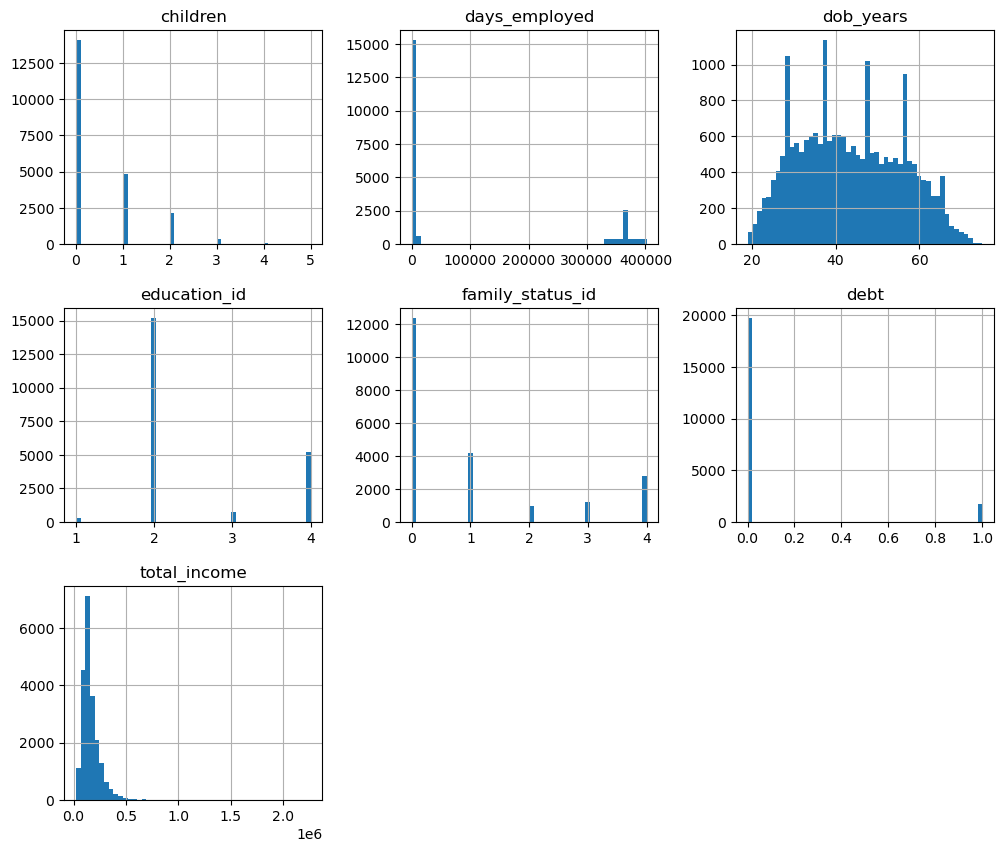

In [334]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
df.hist(bins=50, grid=True, figsize=(12,10))
plt.show()

In [261]:
# ToDo plot the correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.185329,-0.318882,0.032552,-0.157670,0.025324,0.029042
days_employed,-0.185329,1.000000,0.482365,-0.090085,0.002767,-0.040102,-0.201027
dob_years,-0.318882,0.482365,1.000000,-0.149727,-0.069105,-0.071946,-0.053875
education_id,0.032552,-0.090085,-0.149727,1.000000,0.030819,-0.057181,0.210697
family_status_id,-0.157670,0.002767,-0.069105,0.030819,1.000000,0.020951,-0.008504
debt,0.025324,-0.040102,-0.071946,-0.057181,0.020951,1.000000,-0.011177
total_income,0.029042,-0.201027,-0.053875,0.210697,-0.008504,-0.011177,1.000000


In [146]:
correlation= df.select_dtypes(include=['number']).corr()
correlation['debt'].sort_values(ascending=False)

debt                1.000000
children            0.025324
family_status_id    0.020951
total_income       -0.011177
days_employed      -0.040102
education_id       -0.057181
dob_years          -0.071946
Name: debt, dtype: float64

## Your conclusions

Look at the correlation results and the histograms.

- If you are to build a classifier that tries to predict the liklyhood of someone defaulting on their dept (this is indicated by the `debpt` label) do you think you will be able to do it with this dataset? Explain why and indicate which features are likely to help or not help with this process.

Answer: **write answer**

- If you have a chance to extend your dataset with more data, what would be the type of data that you would like to get to improve the quality of your classifier?

Answer: **write answer**


In [148]:
# Based on the correlations between the debt feature and other features, the correlations are very weak. Because of the weak correlation , bulding a classifier based of this dataset would not be ideal.
# maybe adding features like spending habits, demographic data, employment history, credit score would help get stronger correlations.